### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV

D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
index=['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6',
       'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4','AI_5', 'AI_6','AS(NA)_0',
       'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6','BL_0',
       'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 
       'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6','AS(NAC)_0',
       'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4','AS(NAC)_5', 'AS(NAC)_6',
       'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 
       'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6','NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6',
       'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3','ADL_4', 'ADL_5', 'ADL_6','NAD_0', 'NAD_1', 'NAD_2','NAD_3', 'NAD_4', 'NAD_5', 
       'NAD_6','Buzz']
data=pd.read_csv("Twitter.data",names=index)

In [4]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [5]:
X=data.iloc[:,0:77].values
y=data.iloc[:,77].values

In [6]:
from sklearn.model_selection import train_test_split
sample_X1, sample_X2, sample_y1,sample_y2 = train_test_split(X, y, shuffle = True, test_size = 0.1,random_state=42)

In [7]:
print(sample_X2.shape)
print(sample_y2.shape)

(58325, 77)
(58325,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(sample_X2, sample_y2, test_size = 0.3, random_state = 42)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Regression Models with Bagging 

#### 1. Knn Regressor with bagging

In [10]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors=5)
bag_reg = BaggingRegressor(knn_reg,n_estimators=10,bootstrap=True,random_state=42)
bagging=bag_reg.fit(X_train_scaled, y_train)

In [11]:
bagging.score(X_train_scaled,y_train)

0.9492859759692062

In [12]:
bagging.score(X_test_scaled,y_test)

0.920931710949445

#### 2. Linear Regression with bagging 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

lin_reg =LinearRegression()
bag_reg2 = BaggingRegressor(lin_reg,n_estimators=100,bootstrap=True,random_state=42)
bagging2=bag_reg2.fit(X_train_scaled, y_train)


In [14]:
bagging2.score(X_train_scaled,y_train)

0.9543426208864909

In [15]:
bagging2.score(X_test_scaled,y_test)

0.9389114261392698

### Pasting 

#### 1. Pasting with KNN regressor 

In [16]:
knn_reg2 = KNeighborsRegressor(n_neighbors=5)
bag_reg3 = BaggingRegressor(knn_reg,n_estimators=10,bootstrap=False,random_state=42)
pasting=bag_reg3.fit(X_train_scaled, y_train)

In [17]:
pasting.score(X_train_scaled,y_train)

0.9457744968614004

In [18]:
pasting.score(X_test_scaled,y_test)

0.9204684338160212

#### 2. Pasting with LinearRegression

In [19]:
lin_reg2 =LinearRegression()
bag_reg4 = BaggingRegressor(lin_reg2,n_estimators=100,bootstrap=False,random_state=42)
pasting2=bag_reg4.fit(X_train_scaled, y_train)


In [20]:
pasting2.score(X_train_scaled,y_train)

0.9555735458295268

In [21]:
pasting2.score(X_test_scaled,y_test)

0.937887250415886

### Regression with Adaboost 

#### 1. Ridge regression with Adaboost 

In [22]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge


ada_reg = AdaBoostRegressor(Ridge(alpha=1), n_estimators=10, learning_rate=0.5, random_state=42)
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         learning_rate=0.5, loss='linear', n_estimators=10,
         random_state=42)

In [23]:
ada_reg.score(X_train_scaled,y_train)

0.9456699814392133

In [24]:
ada_reg.score(X_test_scaled,y_test)

0.928070880700711

#### 2. Lasso with Adaboost 

In [25]:
from sklearn.linear_model import Lasso


ada_reg2 = AdaBoostRegressor(Lasso(alpha=10), n_estimators=10, learning_rate=0.5, random_state=42)
ada_reg2.fit(X_train_scaled, y_train)

D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You migh

AdaBoostRegressor(base_estimator=Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         learning_rate=0.5, loss='linear', n_estimators=10,
         random_state=42)

In [26]:
ada_reg2.score(X_train_scaled,y_train)

0.9400653400927889

In [27]:
ada_reg2.score(X_test_scaled,y_test)

0.9152241906521852

### Gradient Boosting

In [28]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=50, learning_rate=1.0, random_state=42)
gbrt.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [29]:
gbrt.score(X_train_scaled,y_train)

0.9795955321618536

In [30]:
gbrt.score(X_test_scaled,y_test)

0.89777579497936

### PCA 

In [31]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


pca = PCA(2)
pca.fit(sample_X2)
X_pca = pca.transform(sample_X2)
print("original shape:   ", sample_X2.shape)
print("transformed shape:", X_pca.shape)

original shape:    (58325, 77)
transformed shape: (58325, 2)


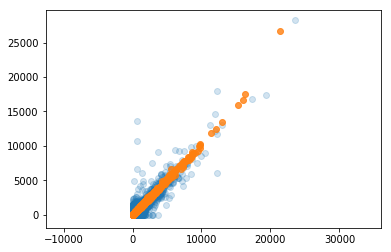

In [32]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(sample_X2[:, 0], sample_X2[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

### Spliting the data 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, sample_y2, test_size = 0.3, random_state = 42)

#### 1. Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

accuracy1 = pd.DataFrame(index=None, columns=['Modelname','Training accuracy', 'Testing accuracy'])

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
trainScore= lin_reg.score(X_train,y_train)
testScore= lin_reg.score(X_test,y_test)

In [35]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'Linear Regression','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916


#### 2. KNN Regression

In [36]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

trainScore= knn.score(X_train,y_train)
testScore= knn.score(X_test,y_test)

In [37]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'KNN Regression','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961


#### 3. Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures
train_score_list=[]
test_score_list=[]
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lin_reg.fit(X_train_poly, y_train)
    train_score_list.append(lin_reg.score(X_train_poly, y_train))
    test_score_list.append(lin_reg.score(X_test_poly, y_test))

trainScore = np.mean(train_score_list)
testScore = np.mean(test_score_list)

In [39]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'Polynomial Regression','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961
2,Polynomial Regression,0.921521,0.905709


#### 4. Ridge Regression

In [40]:
ridge = Ridge(alpha=20)
ridge.fit(X_train,y_train)

trainScore= ridge.score(X_train,y_train)
testScore= ridge.score(X_test,y_test)

In [41]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'Ridge Regression','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961
2,Polynomial Regression,0.921521,0.905709
3,Ridge Regression,0.919202,0.906916


#### 5. Lasso Regression

In [42]:
lasso = Lasso(alpha=10)
lasso.fit(X_train,y_train)

trainScore= lasso.score(X_train,y_train)
testScore= lasso.score(X_test,y_test)

In [43]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'Lasso Regression','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961
2,Polynomial Regression,0.921521,0.905709
3,Ridge Regression,0.919202,0.906916
4,Lasso Regression,0.919202,0.906918


#### 6. SVR

In [44]:
from sklearn.svm import SVR

svr = SVR(C=150,epsilon=0.05,kernel='rbf',max_iter=15000)
svr.fit(X_train,y_train)

trainScore= svr.score(X_train,y_train)
testScore= svr.score(X_test,y_test)

D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=15000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [45]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'SVR','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961
2,Polynomial Regression,0.921521,0.905709
3,Ridge Regression,0.919202,0.906916
4,Lasso Regression,0.919202,0.906918
5,SVR,0.134429,0.042271


#### 7. Linear SVR

In [46]:
lin_svr = SVR(C=0.03,epsilon=2,kernel='linear',max_iter=100000)
lin_svr.fit(X_train, y_train)

trainScore= lin_svr.score(X_train,y_train)
testScore= lin_svr.score(X_test,y_test)

D:\UTD\sem 3\python\Anaconda\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [47]:
accuracy1 = accuracy1.append(pd.Series({'Modelname':'Linear SVR','Training accuracy':trainScore, 'Testing accuracy':testScore}),ignore_index=True )
accuracy1

,Modelname,Training accuracy,Testing accuracy
0,Linear Regression,0.919202,0.906916
1,KNN Regression,0.931904,0.897961
2,Polynomial Regression,0.921521,0.905709
3,Ridge Regression,0.919202,0.906916
4,Lasso Regression,0.919202,0.906918
5,SVR,0.134429,0.042271
6,Linear SVR,0.771604,0.741399


In [48]:
Modelname=['Linear Regression','KNN Regression','Polynomial Regression','Ridge Regression','Lasso Regression','SVR','Linear SVR']
Training_accuracy = [0.962268,0.948697,0.973469,0.962198,0.960627,0.773329,0.932511]
Testing_accuracy = [0.867758,0.936622,0.7804242,0.867613,0.877026,0.825260,0.821511]

accuracy=pd.DataFrame({'Modelname':Modelname,'Training accuracy':Training_accuracy,'Testing accuracy':Testing_accuracy})

In [49]:
### Comparing the Two dataframes

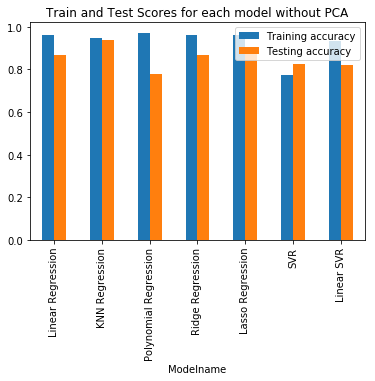

In [50]:
%matplotlib inline
col=['Modelname','Training accuracy','Testing accuracy']
accuracy[col].set_index('Modelname').plot(kind = 'bar');
plt.title('Train and Test Scores for each model without PCA')
plt.show()

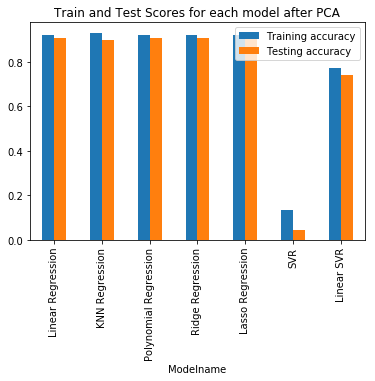

In [51]:
%matplotlib inline
col=['Modelname','Training accuracy','Testing accuracy']
accuracy1[col].set_index('Modelname').plot(kind = 'bar');
plt.title('Train and Test Scores for each model after PCA')
plt.show()

After Comparing the two tables with and without the PCA, 
we can say that For Linear Regression,KNN regression,polynomial regression,Ridge regression, Lasso rigression our Model works very good after PCA 
but for this data it decreases the Training and testing accuracy for SVR and linear SVR significantly

## Applying Deep Learning Models(Neural Network)

In [52]:
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
from keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(256, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
model.add(Dense(32,  kernel_initializer='normal', activation='relu'))
model.add(Dense(1,  kernel_initializer='normal'))


D:\UTD\sem 3\python\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [53]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
model.fit(X_train_scaled, y_train, epochs = 20, batch_size = 125)

Epoch 1/20
40827/40827 [==============================] - 3s 79us/step - loss: 161673.4742
Epoch 2/20
40827/40827 [==============================] - 2s 41us/step - loss: 61172.4169
Epoch 3/20
40827/40827 [==============================] - 2s 43us/step - loss: 60502.0798
Epoch 4/20
40827/40827 [==============================] - 2s 40us/step - loss: 55897.1545
Epoch 5/20
40827/40827 [==============================] - 2s 39us/step - loss: 45832.6674
Epoch 6/20
40827/40827 [==============================] - 2s 43us/step - loss: 41756.1963
Epoch 7/20
40827/40827 [==============================] - 2s 41us/step - loss: 40008.9894
Epoch 8/20
40827/40827 [==============================] - 2s 41us/step - loss: 33565.2741
Epoch 9/20
40827/40827 [==============================] - 2s 41us/step - loss: 31522.8638
Epoch 10/20
40827/40827 [==============================] - 2s 45us/step - loss: 28601.3397
Epoch 11/20
40827/40827 [==============================] - 2s 50us/step - loss: 31028.1465
Epoch 1

In [55]:
model.evaluate(X_test_scaled, y_test)

17498/17498 [==============================] - 1s 38us/step


23147.47856016134

here,the mean Square error is very high for our data thats why we can say that this model is not good fit for our model